In [1]:
import jax
import jax.numpy as jnp

from cardiax import fk, ode
from cardiax.fk import params
from cardiax.ode.conditions import neumann
from cardiax.ode import stimulus
from deepx import generate

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
rng = jax.random.PRNGKey(12)
shape = (1200, 1200)
state = fk.solve.init(shape)
boundary = neumann()
parameter_set = params.PARAMSET_5
diffusivity = generate.random_diffusivity(rng, shape)
stimuli = [
    stimulus.linear(
        shape, stimulus.Direction.SOUTH, 0.2, 20., stimulus.Protocol(0, 2, 1e9)
    )
]
dx = 0.01
dt = 0.01

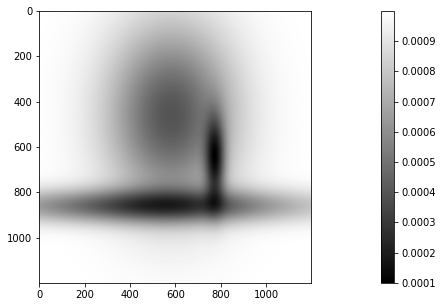

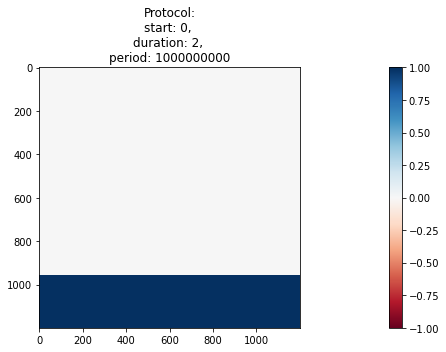

TypeError: <class 'function'> is not a valid JAX type

In [3]:
# test
ode.solve.forward(
    fk.solve.step,
    state,
    jnp.arange(0, 50000, 1200),
    boundary,
    parameter_set,
    diffusivity,
    stimuli,
    dt,
    dx,
    plot=True,
)

In [7]:
import functools
import matplotlib.pyplot as plt

def first(x, h=1.0):
    def _first_derivative(a, axis):
        f = functools.partial(jax.lax.slice_in_dim, a, axis=axis)
        return (
            jnp.concatenate(
                (
                    # 6th order forward edge points
                    (
                        -49 / 20 * f(0, 4)
                        + 6 * f(1, 5)
                        - 15 / 2 * f(2, 6)
                        + 20 / 3 * f(3, 7)
                        - 15 / 4 * f(4, 8)
                        + 6 / 5 * f(5, 9)
                        - 1 / 6 * f(6, 10)
                    ),
                    # 8th order central inner points
                    (
                        +1 / 280 * f(0, -8)
                        - 4 / 105 * f(1, -7)
                        + 1 / 5 * f(2, -6)
                        - 4 / 5 * f(3, -5)
                        # + 0 * f(4, -4)
                        + 4 / 5 * f(5, -3)
                        - 1 / 5 * f(6, -2)
                        + 4 / 105 * f(7, -1)
                        - 1 / 280 * f(8, None)
                    ),
                    # 3th order backward edge points
                    (
                        -1 / 3 * f(-7, -3)
                        + 3 / 2 * f(-6, -2)
                        - 3 * f(-5, -1)
                        + 11 / 6 * f(-4, None)
                    ),
                )
            , axis=axis)
            / h
        )

    return jnp.apply_over_axes(_first_derivative, x, jnp.arange(0, len(x.shape)))

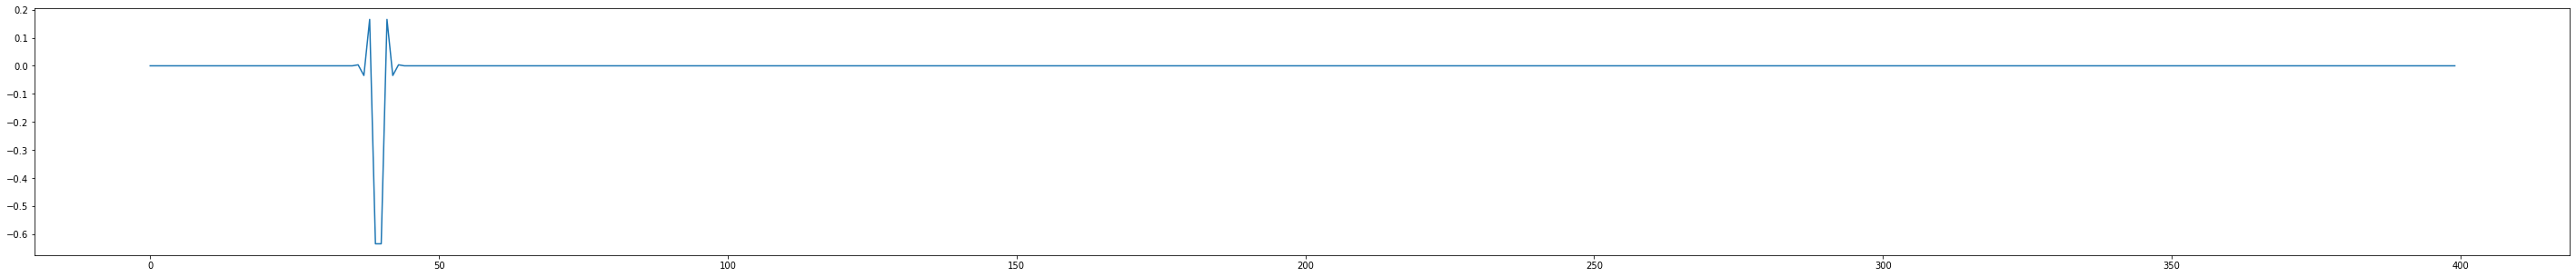

In [8]:
a = jnp.tanh(stimuli[0].field)

# plt.plot(a[:, 0])
plt.figure(figsize=(50, 5))
plt.plot(first(a[:, 0])[200:600])
plt.show()

In [9]:
x, y = first(a).shape

In [44]:
v = a[0]
g = fd1(v)
print(v.shape)
print(g.shape)

(1200,)
(1200,)


In [41]:
f = functools.partial(jax.lax.slice_in_dim, a, axis=0)

f(-4, None).shape


(4, 1200)

In [31]:
jax.lax.slice_in_dim(jnp.arange(0, 10), -2, -1)

DeviceArray([8], dtype=int32)

In [43]:
v = a[0]
g = fd11(v)
print(v.shape)
print(g.shape)

(1200,)
(1192,)


In [57]:
def second(x):
    def _second_derivative(a, axis):
        f = functools.partial(jax.lax.slice_in_dim, a, axis=axis)
        return jnp.concatenate(
            (
                # 6th order forward edge points
                (
                    +469 / 90 * f(0, 4)
                    - 223 / 10 * f(1, 5)
                    + 879 / 20 * f(2, 6)
                    - 949 / 18 * f(3, 7)
                    + 41 * f(4, 8)
                    - 201 / 10 * f(5, 9)
                    + 1019 / 180 * f(6, 10)
                    - 7 / 10 * f(7, 11)
                ),
                # 8th order central inner points
                (
                    -1 / 560 * f(0, -8)
                    + 8 / 315 * f(1, -7)
                    - 1 / 4 * f(2, -6)
                    + 8 / 5 * f(3, -5)
                    - 205 / 71 * f(4, -4)
                    + 8 / 5 * f(5, -3)
                    - 1 / 5 * f(6, -2)
                    + 8 / 315 * f(7, -1)
                    - 1 / 560 * f(8, None)
                ),
                # 2th order backward edge points
                (-1 * f(-7, -3) + 4 * f(-6, -2) - 5 * f(-5, -1) + 2 * f(-4, None)),
            )
        )

    return jnp.apply_over_axes(_second_derivative, x, jnp.arange(0, len(x.shape)))

(1200,)
(1200,)


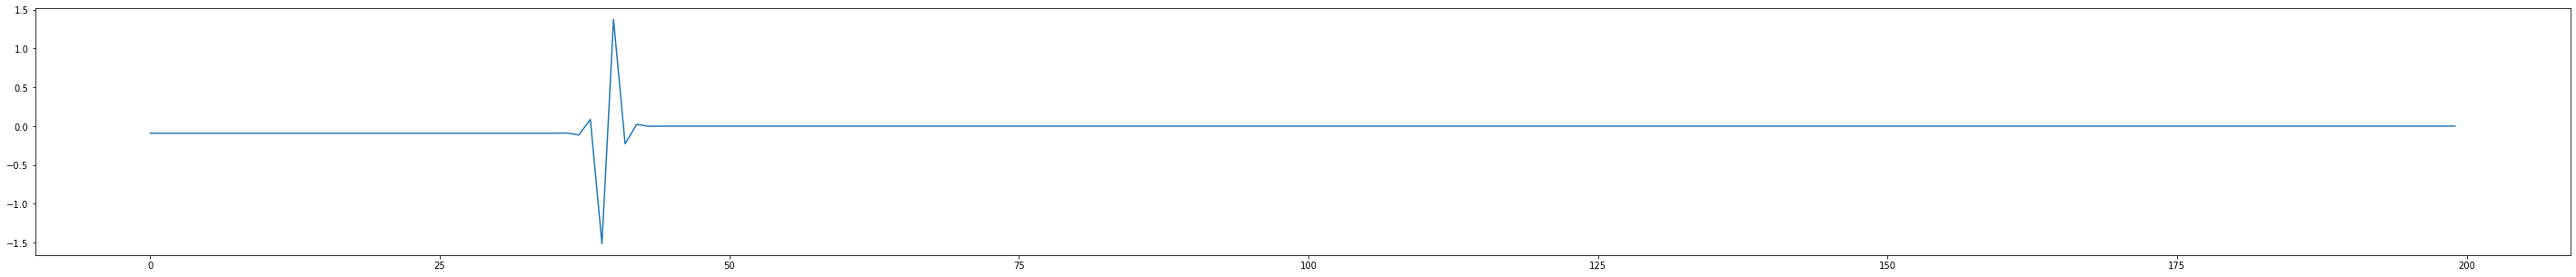

In [59]:
v = a[0]
g = second(v)
print(v.shape)
print(g.shape)

plt.figure(figsize=(50, 5))
plt.plot(second(a[:, 0])[200:400])
plt.show()

In [61]:
a[:, 0].shape

(1200,)